<a href="https://colab.research.google.com/github/Homiez09/nlp-review-colab/blob/main/Ass_6_DL%26RNN_fastfood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install pythainlp
!pip  install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 95.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from pythainlp.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Flatten, SimpleRNN
from keras.utils import pad_sequences

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1K0VgdwYagNidu5k_y5pnSrGrGIOBPsyS' -O Fastfood_Opinion.csv

--2023-08-17 21:47:49--  https://docs.google.com/uc?export=download&id=1K0VgdwYagNidu5k_y5pnSrGrGIOBPsyS
Resolving docs.google.com (docs.google.com)... 142.250.31.101, 142.250.31.139, 142.250.31.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.31.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hahs18k2l0gvv6mtdbhslau7lp11202b/1692308850000/07034668329300256193/*/1K0VgdwYagNidu5k_y5pnSrGrGIOBPsyS?e=download&uuid=edfa7413-755a-4767-843e-717d3e40eb41 [following]
--2023-08-17 21:47:49--  https://doc-10-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hahs18k2l0gvv6mtdbhslau7lp11202b/1692308850000/07034668329300256193/*/1K0VgdwYagNidu5k_y5pnSrGrGIOBPsyS?e=download&uuid=edfa7413-755a-4767-843e-717d3e40eb41
Resolving doc-10-90-docs.googleusercontent.com (doc-10-90-docs.googleusercontent.com)... 172.253.122.132, 2607:f8b0

In [4]:
df = pd.read_csv("Fastfood_Opinion.csv", encoding='utf8')
df.head(5)

,class,message
0,0,11.30 น. ไปที่สาขาในปั๊มคาลเท็กซ์ ประชานุกูล ซ...
1,0,BK ทุกสาขาบริการดี โดยเฉพาะอย่างยิ่งเอมโพเรียม...
2,0,Burger King สาขา The Bright พระราม 2 บริการห่ว...
3,0,Burger King สาขาปั้ม ป.ต.ท.บ้านพร อ.ถลาง เมื่อ...
4,0,chicken strip ชิ้นเล็กมาก เทียบกับป้ายโฆษณาบนโต๊ะ


In [5]:
from keras.preprocessing.text import Tokenizer
import re
from pythainlp.corpus import thai_stopwords

STOP_WORD = list(thai_stopwords()) + [" ", "\n"]
FORMAT = r"[\u0E00-\u0E7Fa-z'0-9]+"

def tokenize(sentence):
  return word_tokenize(sentence, engine="newmm")

def cleaning_stop_word(tk_list):
  return [word for word in tk_list if word not in STOP_WORD]

def cleaning_symbols_emoji(tk_list):
  return [re.findall(FORMAT, text)[0] for text in tk_list if re.findall(FORMAT, text)]

def big_cleanning(sentenece):
  return cleaning_symbols_emoji(cleaning_stop_word(tokenize(sentenece)))

data = np.array(df.values)
trainToken = [big_cleanning(st) for st in data[:,1]]
max_length = max([len(tk) for tk in trainToken])

y = df['class'].values

In [6]:
import copy
all = set()
words = {}

for st in trainToken:
  for w in st:
    all.add(w)

for w in all:
  words[w] = len(words) + 1

tts = copy.deepcopy(trainToken)
for st in range(len(tts)):
  for w in range(len(tts[st])):
    if words.get(tts[st][w]) != None:
      tts[st][w] = words[tts[st][w]]
    else:
      print("Not Found :", tts[st][w])
      w = 0

vocab_size = len(words) + 1

In [7]:
tokenizer = Tokenizer()

tokenizer.word_index

print("Raw Texts to Sequence:")
for s in tts:
  print(s)

Raw Texts to Sequence:
[98, 570, 2663, 2323, 2660, 475, 1401, 2026, 1022, 2832, 2015, 2832, 2370, 2242, 2056, 2247, 1566, 2832, 2015, 1989, 2832, 2939, 2100, 2056, 2398]
[2663, 2451, 1737, 1204, 430, 247, 2855, 2500, 500, 2451, 1737, 233, 32, 1663, 1360, 2663, 2532, 2663, 435, 2777, 2784, 32, 2451, 1387, 339, 1655, 2152, 864, 954, 163, 1311, 700, 2823, 2719, 640, 1503, 1566, 2327, 132, 2451, 435, 32, 623, 2842, 2214, 569, 2663, 2547, 2663, 233, 2777, 1082, 684, 430, 247, 2855, 2500, 1463, 2532, 2772, 163, 1112, 203, 2766, 536, 1532]
[1618, 387, 2663, 2721, 271, 1861, 2242, 2451, 895, 1566, 1921, 1255, 500, 393, 424, 333, 625, 1548, 979, 500, 386, 2080, 777, 777, 820, 393, 2712, 1143, 1490, 2735, 778, 2735, 1408, 957, 1921, 839, 2507, 820, 1490, 1405, 838, 1384, 2756, 1885, 1238, 1670, 2290, 132, 2735, 778, 1490, 1143, 2293, 537, 2040, 1408, 908, 510, 2067, 874, 1095, 213, 2242, 1384, 1984, 1670, 512, 777, 2242, 1447, 2712, 512, 1143, 2293, 537, 2040, 1490, 2409, 1490, 163, 2706, 820, 5

In [8]:
# เตรียมประโยค เป็น sequence ที่มีความยาวเท่ากัน
X = pad_sequences(tts, maxlen=max_length, padding="post")
print("Sequence Padding at maxlen words, post padding:\n", X)

Sequence Padding at maxlen words, post padding:
 [[  98  570 2663 ...    0    0    0]
 [2663 2451 1737 ...    0    0    0]
 [1618  387 2663 ...    0    0    0]
 ...
 [  32 1742    0 ...    0    0    0]
 [ 233 2451 2457 ...    0    0    0]
 [  32 1742    0 ...    0    0    0]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)

# Deep Learning

In [10]:
model_DL = Sequential()
model_DL.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model_DL.add(Flatten())
model_DL.add(Dense(20, activation='relu'))
model_DL.add(Dense(1, activation='sigmoid'))

model_DL.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_DL.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

#Evaluate the model
loss, accuracy = model_DL.evaluate(X_test, y_test)
print(f"Test Loss: {loss*100:.2f}")
print(f"Test Accuracy: {accuracy*100:.2f}")

Epoch 1/5
14/14 [==============================] - 1s 19ms/step - loss: 0.6778 - accuracy: 0.5116 - val_loss: 0.6256 - val_accuracy: 0.5102
Epoch 2/5
14/14 [==============================] - 0s 7ms/step - loss: 0.6111 - accuracy: 0.5625 - val_loss: 0.5405 - val_accuracy: 0.7755
Epoch 3/5
14/14 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.6921 - val_loss: 0.5170 - val_accuracy: 0.7347
Epoch 4/5
14/14 [==============================] - 0s 7ms/step - loss: 0.5222 - accuracy: 0.7639 - val_loss: 0.5021 - val_accuracy: 0.7143
Epoch 5/5
6/6 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.7950
Test Loss: 49.07
Test Accuracy: 79.50


# RNN

In [11]:
model_RNN = Sequential()
model_RNN.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model_RNN.add(SimpleRNN(units=20, activation='relu'))
model_RNN.add(Dense(1, activation='sigmoid'))

model_RNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_RNN.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

#Evaluate the model
loss, accuracy = model_RNN.evaluate(X_test, y_test)
print(f"Test Loss: {loss*100:.2f}")
print(f"Test Accuracy: {accuracy*100:.2f}")

Epoch 1/5
14/14 [==============================] - 2s 63ms/step - loss: 0.6944 - accuracy: 0.4769 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/5
14/14 [==============================] - 1s 65ms/step - loss: 0.6911 - accuracy: 0.5394 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 3/5
14/14 [==============================] - 1s 66ms/step - loss: 0.6904 - accuracy: 0.5394 - val_loss: 0.6938 - val_accuracy: 0.5102
Epoch 4/5
14/14 [==============================] - 1s 61ms/step - loss: 0.6902 - accuracy: 0.5394 - val_loss: 0.6942 - val_accuracy: 0.5102
Epoch 5/5
6/6 [==============================] - 0s 9ms/step - loss: 0.6763 - accuracy: 0.6273
Test Loss: 67.63
Test Accuracy: 62.73


In [12]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model_LSTM.add(LSTM(16))
model_LSTM.add(Dense(4, activation='relu'))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.summary()

model_LSTM.compile(loss="binary_crossentropy", optimizer="adam", metrics=['acc'])
model_LSTM.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

loss, accuracy = model_LSTM.evaluate(X_test, y_test)
print(f"Test Loss: {loss*100:2f}")
print(f"Test Accuracy: {accuracy*100:.2f}")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 185, 64)           189120    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 194,377
Trainable params: 194,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
14/14 [==============================] - 5s 162ms/step - loss: 0.6927 - acc: 0.5394 - val_loss: 0.6930 - val_acc: 0.5102
Epoch 2/5
14/14 [==============================] 

In [13]:
model_BiLSTM = Sequential()
model_BiLSTM.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model_BiLSTM.add(Bidirectional(LSTM(8)))
model_BiLSTM.add(Dense(4, activation='relu'))
model_BiLSTM.add(Dense(1, activation='sigmoid'))
model_BiLSTM.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['acc'])
model_BiLSTM.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

model_BiLSTM.fit
loss, accuracy = model_BiLSTM.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_BiLSTM.evaluate(X_test, y_test, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 6s 119ms/step - loss: 0.0000e+00 - acc: 0.5324 - val_loss: 0.0000e+00 - val_acc: 0.5102
Epoch 2/5
14/14 [==============================] - 1s 75ms/step - loss: 0.0000e+00 - acc: 0.5394 - val_loss: 0.0000e+00 - val_acc: 0.5102
Epoch 3/5
14/14 [==============================] - 2s 128ms/step - loss: 0.0000e+00 - acc: 0.5394 - val_loss: 0.0000e+00 - val_acc: 0.5102
Epoch 4/5
14/14 [==============================] - 1s 73ms/step - loss: 0.0000e+00 - acc: 0.5394 - val_loss: 0.0000e+00 - val_acc: 0.5102
Epoch 5/5
14/14 [==============================] - 1s 73ms/step - loss: 0.0000e+00 - acc: 0.5394 - val_loss: 0.0000e+00 - val_acc: 0.5102
Training Accuracy: 0.5364
Training Accuracy: 0.6273


In [23]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             color="white" if cm[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

เปรียบเทียบผลลัพธ์ที่ได้

6/6 [==============================] - 0s 2ms/step
Normalized confusion matrix
[[0.96039604 0.03960396]
 [0.48333333 0.51666667]]


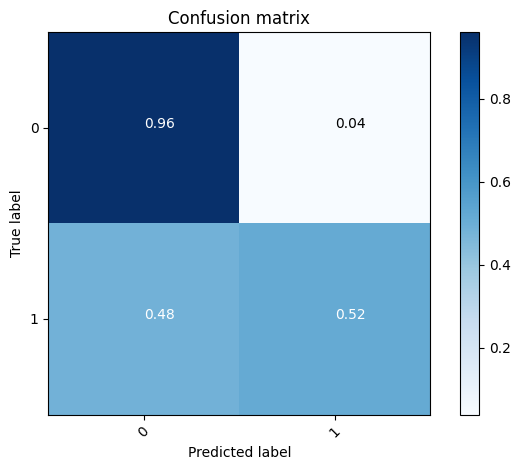

In [24]:
# model_no1
from sklearn.metrics import confusion_matrix
y_predict = model_DL.predict(X_test)
y_p = (y_predict > 0.5).astype(int)

cm=confusion_matrix(y_test, y_p)
plot_confusion_matrix(cm=cm, classes=['0', '1'], normalize=True)
plt.show()